# Framingham Heart Disease Prediction using Logistic Regression
This project uses the Framingham Heart Study dataset to predict the 10-year risk of coronary heart disease (CHD) using Logistic Regression.


## 1. Import Required Libraries
We start by importing essential Python libraries for data analysis, visualization, and machine learning.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


## 2. Load and Explore the Dataset
We load the Framingham Heart Study dataset and take a look at its structure, columns, and data types.


In [9]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## 3: Data Cleaning
We check for missing values and handle them appropriately to ensure the data is ready for modeling.


In [12]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [14]:
df["education"].fillna(df["education"].mode()[0], inplace=True)

C:\Users\Shazal\AppData\Local\Temp\ipykernel_18156\853838877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["education"].fillna(df["education"].mode()[0], inplace=True)


In [15]:
for i in ['cigsPerDay','totChol','BMI','heartRate','glucose']:
    df[i].fillna(df[i].median(), inplace=True)

C:\Users\Shazal\AppData\Local\Temp\ipykernel_18156\2478582014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\Shazal\AppData\Local\Temp\ipykernel_18156\2478582014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [16]:
df["BPMeds"].fillna(0,inplace=True)

C:\Users\Shazal\AppData\Local\Temp\ipykernel_18156\201788876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BPMeds"].fillna(0,inplace=True)


In [17]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
df.to_csv("framinghams_Cleaned.csv",index = False)

## 4. Exploratory Data Analysis (EDA)
We analyze the distribution of the target variable (`TenYearCHD`) and relationships between key features to gain insights into the data.


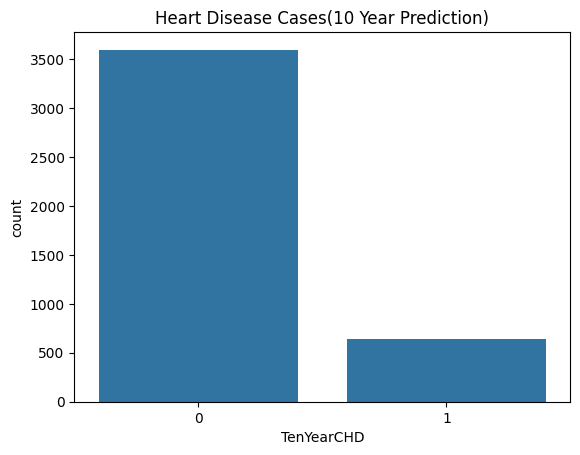

In [20]:
sns.countplot(x="TenYearCHD", data = df)
plt.title("Heart Disease Cases(10 Year Prediction)")
plt.show()

In [21]:
df['TenYearCHD'].value_counts(normalize=True) * 100

TenYearCHD
0    84.811321
1    15.188679
Name: proportion, dtype: float64

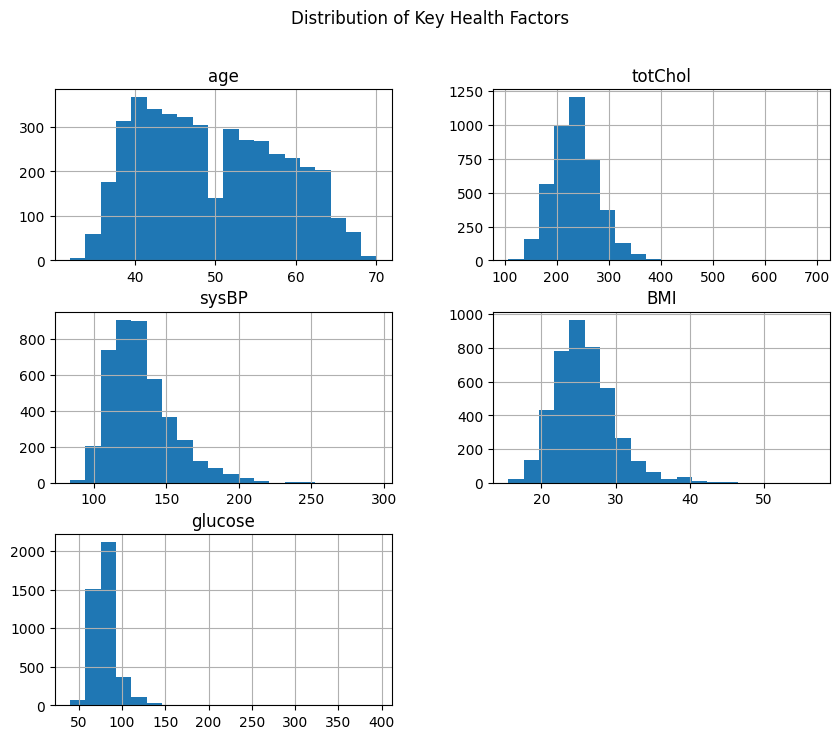

In [22]:
df[['age', 'totChol', 'sysBP', 'BMI', 'glucose']].hist(bins=20,figsize=(10,8))
plt.suptitle("Distribution of Key Health Factors")
plt.show()

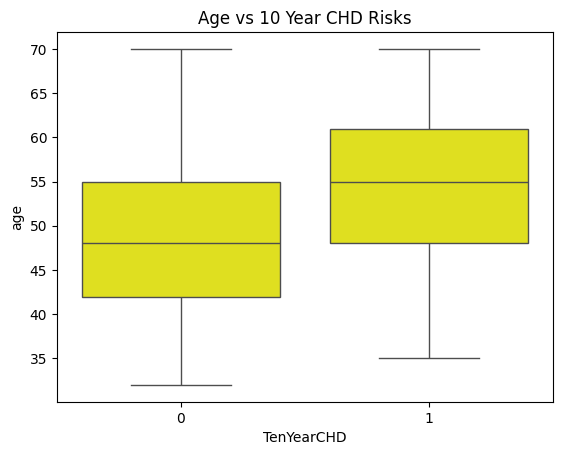

In [23]:
sns.boxplot(x="TenYearCHD" , y="age", data=df,color="yellow")
plt.title("Age vs 10 Year CHD Risks")
plt.show()

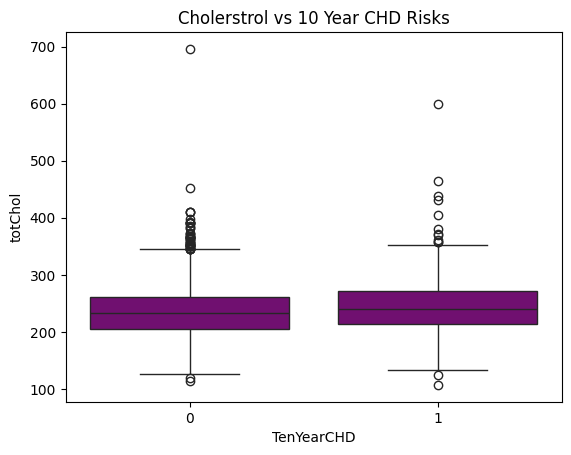

In [24]:
sns.boxplot(x="TenYearCHD" , y="totChol", color="Purple",data=df)
plt.title("Cholerstrol vs 10 Year CHD Risks")
plt.show()

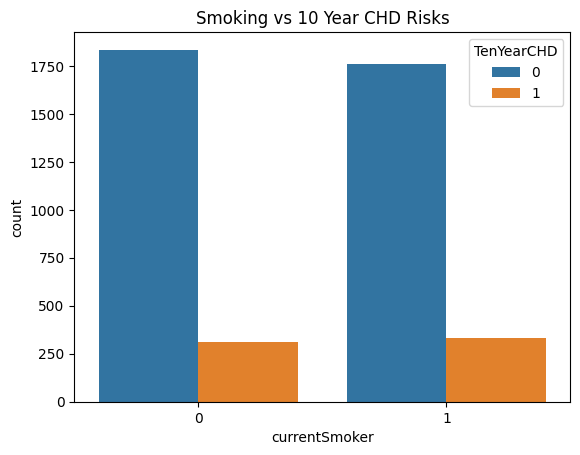

In [25]:
sns.countplot( x="currentSmoker",hue="TenYearCHD" ,data=df)
plt.title("Smoking vs 10 Year CHD Risks")
plt.show()

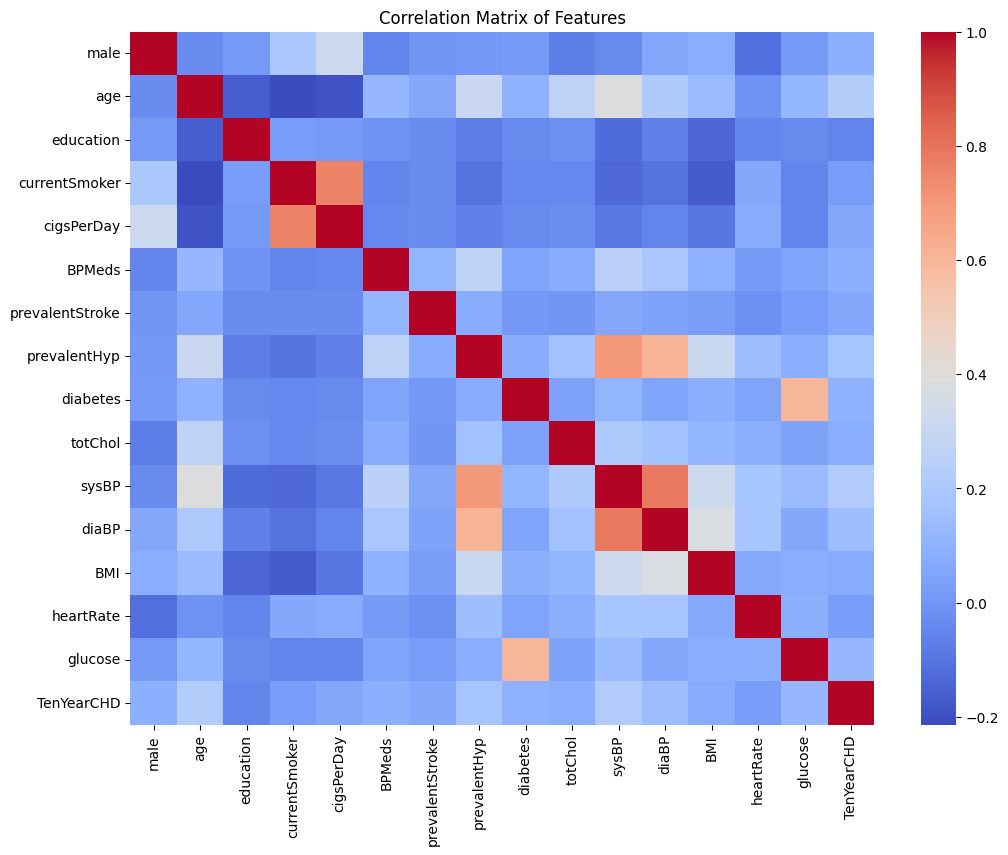

In [26]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()


## 5. Split the Data into Training and Testing Sets
We split the dataset into features (X) and target (y), then divide it into training (80%) and testing (20%) subsets for model evaluation.


In [27]:
X = df.drop('TenYearCHD', axis = 1)
Y = df['TenYearCHD']

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42, stratify=Y)


In [29]:
print("Training set shape : ",X_train.shape)
print("Test set shape : ",X_test.shape)
print(Y_train.value_counts(normalize=True))
print(Y_test.value_counts(normalize=True))


Training set shape :  (3392, 15)
Test set shape :  (848, 15)
TenYearCHD
0    0.848172
1    0.151828
Name: proportion, dtype: float64
TenYearCHD
0    0.847877
1    0.152123
Name: proportion, dtype: float64


## 6. Feature Scaling
We standardize all numerical features to ensure they are on the same scale, which helps improve model performance and convergence.


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Train Logistic Regression Model
We train a Logistic Regression model on the training set to predict the likelihood of heart disease.


In [49]:
log_reg = LogisticRegression(max_iter=1000,random_state=42)
log_reg.fit(X_train_scaled,Y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
y_pred = log_reg.predict(X_test_scaled)

## 8.Model Evaluation
We evaluate the model using accuracy, confusion matrix, and classification report to measure its performance.


In [51]:
accuracy = accuracy_score(Y_test,y_pred)
print("Model Accuracy : ",accuracy)

Model Accuracy :  0.8443396226415094


In [52]:
cm = confusion_matrix(Y_test,y_pred)
print("Confusion Matrix : ",cm)

Confusion Matrix :  [[709  10]
 [122   7]]


In [53]:
report = classification_report(Y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.99      0.91       719
           1       0.41      0.05      0.10       129

    accuracy                           0.84       848
   macro avg       0.63      0.52      0.51       848
weighted avg       0.79      0.84      0.79       848



## Conclusion
- The Logistic Regression model achieved an accuracy of around 84%, which shows that it performs well on the given dataset.
- This project demonstrates the complete process of data preprocessing, exploration, and prediction using Logistic Regression for binary classification problems.
